In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
import math

# Загрузка данных с указанием кодировки UTF-8
try:
    df = pd.read_csv('C:/Users/User/Downloads/famcs_students.csv', encoding='utf-8')
    print("Файл успешно загружен в кодировке UTF-8")
except UnicodeDecodeError:
    try:
        df = pd.read_csv('datasets/famcs_students.csv', encoding='cp1251')
        print("Файл загружен в кодировке Windows-1251")
    except:
        df = pd.read_csv('datasets/famcs_students.csv', encoding='latin1')
        print("Файл загружен в кодировке Latin-1")

# Функция для преобразования строковых значений в числовые
def convert_binary_values(df):
    """Преобразует строковые значения 'Да'/'Нет' в числовые 1/0"""
    df_converted = df.copy()
    
    # Словарь для преобразования
    conversion_dict = {
        'Да': 1, 'Нет': 0,
        'да': 1, 'нет': 0,
        'Yes': 1, 'No': 0,
        'yes': 1, 'no': 0,
        True: 1, False: 0
    }
    
    for col in df_converted.columns:
        if df_converted[col].dtype == 'object':
            # Пробуем преобразовать столбец
            try:
                df_converted[col] = df_converted[col].map(conversion_dict).fillna(df_converted[col])
                # Если успешно преобразовали хотя бы некоторые значения, проверяем результат
                if df_converted[col].dtype in ['int64', 'float64']:
                    print(f"Столбец '{col}' преобразован в числовой")
            except:
                print(f"Столбец '{col}' не преобразован, оставляем как есть")
    
    return df_converted

# Преобразуем данные
print("\nПреобразование данных...")
df = convert_binary_values(df)

# Определение целевой переменной (N=13)
N = 13
binary_cols = ['ss', 'interest', 'weekend_study', 'bad_sleep', 'glasses', 'anime', 'study_form', 'literature']
target_col = binary_cols[N % 8]  # 13 % 8 = 5 -> 'anime'
print(f"\nЦелевая переменная: {target_col}")

# Проверяем наличие целевой переменной в данных
if target_col not in df.columns:
    print(f"Предупреждение: Целевая переменная '{target_col}' не найдена в данных")
    print(f"Доступные колонки: {list(df.columns)}")
    # Используем первую бинарную колонку, которая есть в данных
    available_cols = [col for col in binary_cols if col in df.columns]
    if available_cols:
        target_col = available_cols[0]
        print(f"Используем вместо этого: {target_col}")
    else:
        raise ValueError("Не найдено подходящих колонок для целевой переменной")

# Выбор признаков (экспертное мнение)
selected_features = ['ss', 'interest', 'weekend_study', 'bad_sleep', 'glasses', 'study_form']

# Проверяем наличие выбранных признаков и преобразуем их
available_features = []
for col in selected_features:
    if col in df.columns:
        # Преобразуем категориальные признаки в числовые
        if df[col].dtype == 'object' and col != 'interest':  # 'interest' оставляем как есть для специальной обработки
            unique_vals = df[col].unique()
            print(f"Столбец '{col}': уникальные значения {list(unique_vals)}")
            # Простое числовое кодирование для категориальных признаков
            df[col] = pd.Categorical(df[col]).codes
        available_features.append(col)

# Если признаков меньше 5, добавляем дополнительные
if len(available_features) < 5:
    print(f"Предупреждение: Требуется минимум 5 признаков, найдено {len(available_features)}")
    # Добавляем другие доступные числовые признаки
    additional_candidates = ['age', 'height', 'score', 'retake', 'foot_size', 'work_experience']
    for col in additional_candidates:
        if col in df.columns and col not in available_features and len(available_features) < 5:
            available_features.append(col)
            print(f"Добавлен признак: {col}")

print(f"Используемые признаки: {available_features}")

# Специальная обработка для столбца 'interest' если он есть
if 'interest' in available_features and df['interest'].dtype == 'object':
    print("Обработка категориального признака 'interest'...")
    interest_counts = df['interest'].value_counts()
    print(f"Распределение интересов: {interest_counts.to_dict()}")
    # Простое числовое кодирование
    df['interest'] = pd.Categorical(df['interest']).codes

# Подготовка данных
X = df[available_features].values
y = df[target_col].values

# Проверяем и преобразуем целевую переменную если нужно
if df[target_col].dtype == 'object':
    print(f"Преобразование целевой переменной '{target_col}'...")
    unique_vals = df[target_col].unique()
    print(f"Уникальные значения: {list(unique_vals)}")
    # Простое преобразование: первое значение -> 0, второе -> 1
    y = pd.Categorical(y).codes

print(f"\nРазмерность данных: X {X.shape}, y {y.shape}")
print(f"Уникальные значения y: {np.unique(y)}")
print(f"Распределение классов: {Counter(y)}")

# Разделение на тренировочную, валидационную и тестовую выборки
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp)

print(f"\nРазмеры выборок: Train={X_train.shape}, Val={X_val.shape}, Test={X_test.shape}")
print(f"Распределение классов в обучающей выборке: {Counter(y_train)}")


Файл успешно загружен в кодировке UTF-8

Преобразование данных...
Столбец 'ss' преобразован в числовой
Столбец 'weekend_study' преобразован в числовой
Столбец 'bad_sleep' преобразован в числовой
Столбец 'glasses' преобразован в числовой
Столбец 'anime' преобразован в числовой
Столбец 'literature' преобразован в числовой

Целевая переменная: anime
Столбец 'study_form': уникальные значения ['Бюджет', 'Платная']
Используемые признаки: ['ss', 'interest', 'weekend_study', 'bad_sleep', 'glasses', 'study_form']
Обработка категориального признака 'interest'...
Распределение интересов: {'Программирование': 103, 'Математика': 24}

Размерность данных: X (127, 6), y (127,)
Уникальные значения y: [0 1]
Распределение классов: Counter({0: 73, 1: 54})

Размеры выборок: Train=(88, 6), Val=(19, 6), Test=(20, 6)
Распределение классов в обучающей выборке: Counter({0: 51, 1: 37})


In [23]:
class TrivialClassifier:
    def __init__(self):
        self.most_common_class = None
    
    def fit(self, X, y):
        # Находим наиболее частый класс
        counter = Counter(y)
        self.most_common_class = counter.most_common(1)[0][0]
        return self
    
    def predict(self, X):
        # Всегда предсказываем наиболее частый класс
        return np.full(X.shape[0], self.most_common_class)
    
    def predict_proba(self, X):
        # Для совместимости с другими методами
        n_samples = X.shape[0]
        prob = np.zeros((n_samples, 2))
        prob[:, self.most_common_class] = 1.0
        return prob

In [24]:
class NaiveBayesClassifier:
    def __init__(self):
        self.class_priors = {}
        self.feature_params = {}
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        
        # Вычисляем априорные вероятности классов
        for c in self.classes:
            self.class_priors[c] = np.sum(y == c) / n_samples
        
        # Вычисляем параметры для каждого признака и каждого класса
        self.feature_params = {}
        for c in self.classes:
            X_c = X[y == c]
            self.feature_params[c] = {}
            
            for feature_idx in range(n_features):
                feature_values = X_c[:, feature_idx]
                
                # Для непрерывных признаков используем нормальное распределение
                # Вычисляем среднее и стандартное отклонение
                mean = np.mean(feature_values)
                std = np.std(feature_values)
                
                # Добавляем небольшое значение для избежания нулевого стандартного отклонения
                if std == 0:
                    std = 1e-8
                
                self.feature_params[c][feature_idx] = (mean, std)
        
        return self
    
    def _gaussian_pdf(self, x, mean, std):
        """Функция плотности нормального распределения"""
        exponent = np.exp(-((x - mean) ** 2) / (2 * std ** 2))
        return (1 / (np.sqrt(2 * np.pi) * std)) * exponent
    
    def predict_proba(self, X):
        n_samples = X.shape[0]
        probabilities = np.zeros((n_samples, len(self.classes)))
        
        for i, sample in enumerate(X):
            for j, c in enumerate(self.classes):
                # Начинаем с априорной вероятности класса
                prob = self.class_priors[c]
                
                # Умножаем на вероятности признаков (наивное предположение о независимости)
                for feature_idx, feature_value in enumerate(sample):
                    mean, std = self.feature_params[c][feature_idx]
                    feature_prob = self._gaussian_pdf(feature_value, mean, std)
                    prob *= feature_prob
                
                probabilities[i, j] = prob
        
        # Нормализуем вероятности
        probabilities = probabilities / np.sum(probabilities, axis=1, keepdims=True)
        return probabilities
    
    def predict(self, X):
        probabilities = self.predict_proba(X)
        return np.argmax(probabilities, axis=1)

In [25]:
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        return self
    
    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def predict(self, X):
        predictions = []
        for sample in X:
            # Вычисляем расстояния до всех точек обучающей выборки
            distances = []
            for i, train_sample in enumerate(self.X_train):
                dist = self._euclidean_distance(sample, train_sample)
                distances.append((dist, self.y_train[i]))
            
            # Сортируем по расстоянию и берем k ближайших
            distances.sort(key=lambda x: x[0])
            k_nearest = distances[:self.k]
            
            # Голосование большинством
            k_nearest_labels = [label for _, label in k_nearest]
            most_common = Counter(k_nearest_labels).most_common(1)[0][0]
            predictions.append(most_common)
        
        return np.array(predictions)
    
    def predict_proba(self, X):
        n_samples = X.shape[0]
        probabilities = np.zeros((n_samples, 2))
        
        for i, sample in enumerate(X):
            # Вычисляем расстояния до всех точек обучающей выборки
            distances = []
            for j, train_sample in enumerate(self.X_train):
                dist = self._euclidean_distance(sample, train_sample)
                distances.append((dist, self.y_train[j]))
            
            # Сортируем по расстоянию и берем k ближайших
            distances.sort(key=lambda x: x[0])
            k_nearest = distances[:self.k]
            
            # Вычисляем вероятности на основе голосования
            k_nearest_labels = [label for _, label in k_nearest]
            count_0 = k_nearest_labels.count(0)
            count_1 = k_nearest_labels.count(1)
            
            probabilities[i, 0] = count_0 / self.k
            probabilities[i, 1] = count_1 / self.k
        
        return probabilities

# Подбор оптимального k для KNN
def find_optimal_k(X_train, y_train, X_val, y_val, k_range=range(1, 21)):
    best_k = 1
    best_accuracy = 0
    
    for k in k_range:
        knn = KNNClassifier(k=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_val)
        accuracy = np.mean(y_pred == y_val)
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
    
    return best_k, best_accuracy

optimal_k, optimal_accuracy = find_optimal_k(X_train, y_train, X_val, y_val)
print(f"Оптимальное k: {optimal_k} с точностью {optimal_accuracy:.4f}")

Оптимальное k: 19 с точностью 0.7368


In [26]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -250, 250)))  # Ограничение для численной стабильности
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Градиентный спуск
        for _ in range(self.n_iter):
            # Прямое распространение
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_model)
            
            # Вычисление градиентов
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # Обновление параметров
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
        
        return self
    
    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)
    
    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)

# Функции для оценки качества
def calculate_metrics(y_true, y_pred, y_proba=None):
    # Accuracy
    accuracy = np.mean(y_true == y_pred)
    
    # Precision, Recall, F1
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    # ROC-AUC (упрощенная версия)
    if y_proba is not None:
        # Простая реализация AUC через площадь под кривой
        thresholds = np.linspace(0, 1, 100)
        tpr = []
        fpr = []
        
        for threshold in thresholds:
            y_pred_thresh = (y_proba >= threshold).astype(int)
            tp = np.sum((y_true == 1) & (y_pred_thresh == 1))
            fp = np.sum((y_true == 0) & (y_pred_thresh == 1))
            tn = np.sum((y_true == 0) & (y_pred_thresh == 0))
            fn = np.sum((y_true == 1) & (y_pred_thresh == 0))
            
            tpr.append(tp / (tp + fn) if (tp + fn) > 0 else 0)
            fpr.append(fp / (fp + tn) if (fp + tn) > 0 else 0)
        
        # Вычисление AUC через метод трапеций
        auc = np.trapz(tpr, fpr)
    else:
        auc = 0
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc
    }

def plot_confusion_matrix(y_true, y_pred, title):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Матрица ошибок: {title}')
    plt.ylabel('Истинные значения')
    plt.xlabel('Предсказанные значения')
    plt.show()

# Подбор оптимального порога для логистической регрессии
def find_optimal_threshold(model, X_val, y_val):
    probabilities = model.predict_proba(X_val)
    thresholds = np.linspace(0, 1, 100)
    best_threshold = 0.5
    best_f1 = 0
    
    precisions = []
    recalls = []
    f1_scores = []
    
    for threshold in thresholds:
        y_pred = (probabilities >= threshold).astype(int)
        metrics = calculate_metrics(y_val, y_pred)
        
        precisions.append(metrics['precision'])
        recalls.append(metrics['recall'])
        f1_scores.append(metrics['f1'])
        
        if metrics['f1'] > best_f1:
            best_f1 = metrics['f1']
            best_threshold = threshold
    
    # График зависимости метрик от порога
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, precisions, label='Precision', linewidth=2)
    plt.plot(thresholds, recalls, label='Recall', linewidth=2)
    plt.plot(thresholds, f1_scores, label='F1-score', linewidth=2)
    plt.axvline(x=best_threshold, color='red', linestyle='--', label=f'Оптимальный порог: {best_threshold:.2f}')
    plt.xlabel('Порог классификации')
    plt.ylabel('Метрика')
    plt.title('Зависимость метрик от порога классификации')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return best_threshold, best_f1

=== ТРИВИАЛЬНЫЙ КЛАССИФИКАТОР ===
Accuracy: 0.5500
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC-AUC: -0.5000


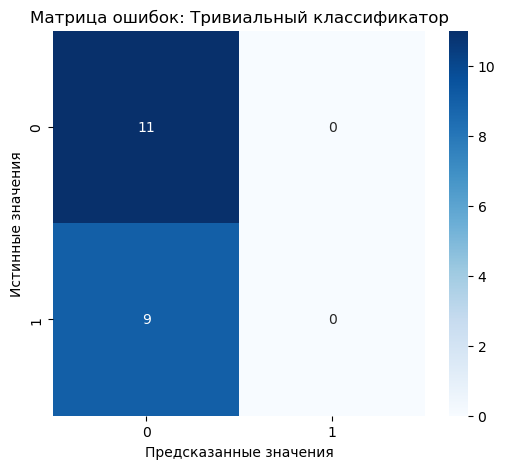


=== НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР ===
Accuracy: 0.4500
Precision: 0.4375
Recall: 0.7778
F1-score: 0.5600
ROC-AUC: -0.5556


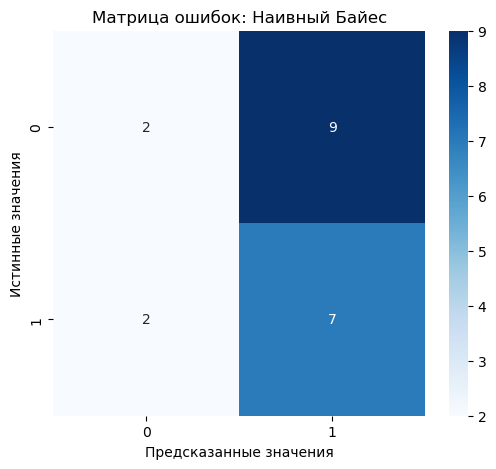


=== K-БЛИЖАЙШИХ СОСЕДЕЙ ===
Оптимальное k: 19
Accuracy: 0.4500
Precision: 0.3750
Recall: 0.3333
F1-score: 0.3529
ROC-AUC: -0.5404


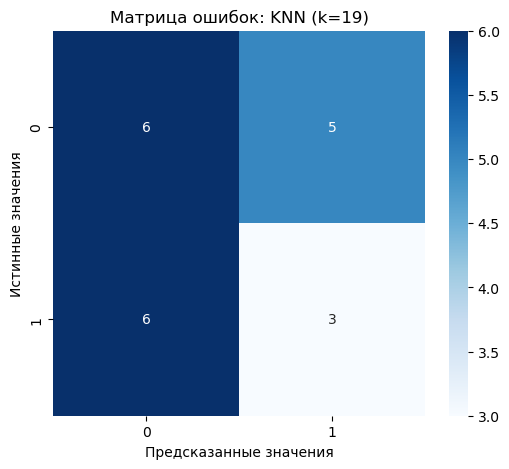


=== ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ ===


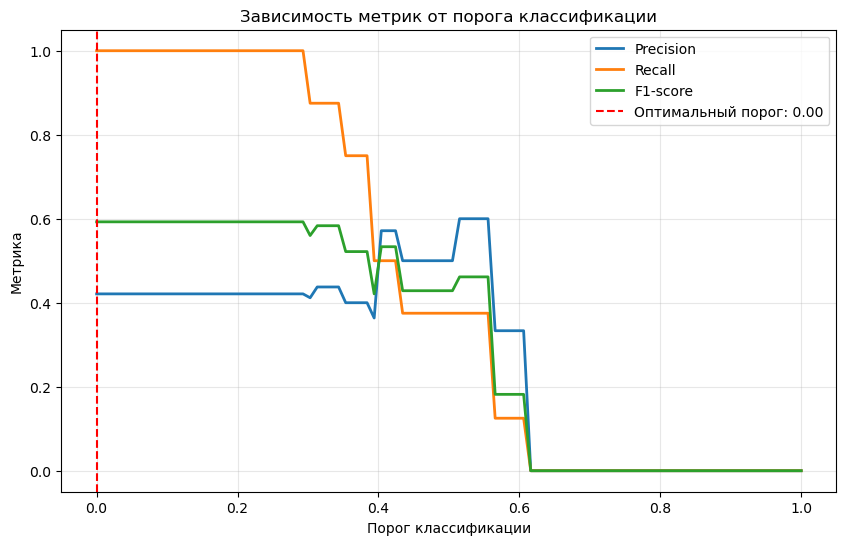

Оптимальный порог: 0.0000
F1-score при оптимальном пороге: 0.5926
Accuracy: 0.4500
Precision: 0.4500
Recall: 1.0000
F1-score: 0.6207
ROC-AUC: -0.5404


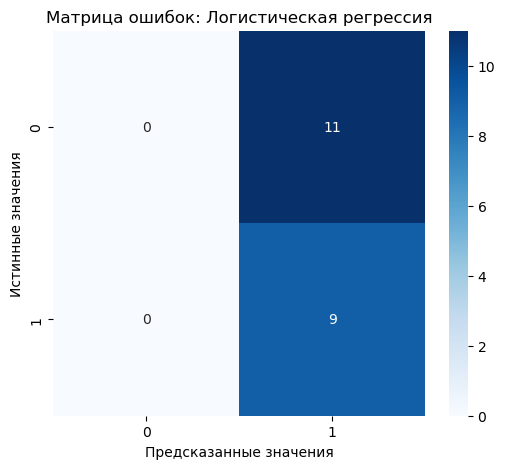


=== СРАВНИТЕЛЬНАЯ ТАБЛИЦА ===
                    Модель  Accuracy  Precision  Recall  F1-score  ROC-AUC
0              Тривиальный      0.55     0.0000  0.0000    0.0000  -0.5000
1            Наивный Байес      0.45     0.4375  0.7778    0.5600  -0.5556
2               KNN (k=19)      0.45     0.3750  0.3333    0.3529  -0.5404
3  Логистическая регрессия      0.45     0.4500  1.0000    0.6207  -0.5404


In [27]:
# 0. Тривиальный классификатор
print("=== ТРИВИАЛЬНЫЙ КЛАССИФИКАТОР ===")
trivial_clf = TrivialClassifier()
trivial_clf.fit(X_train, y_train)
y_pred_trivial = trivial_clf.predict(X_test)
y_proba_trivial = trivial_clf.predict_proba(X_test)[:, 1]
metrics_trivial = calculate_metrics(y_test, y_pred_trivial, y_proba_trivial)

print(f"Accuracy: {metrics_trivial['accuracy']:.4f}")
print(f"Precision: {metrics_trivial['precision']:.4f}")
print(f"Recall: {metrics_trivial['recall']:.4f}")
print(f"F1-score: {metrics_trivial['f1']:.4f}")
print(f"ROC-AUC: {metrics_trivial['auc']:.4f}")
plot_confusion_matrix(y_test, y_pred_trivial, "Тривиальный классификатор")

# 1. Наивный байесовский классификатор
print("\n=== НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР ===")
nb_clf = NaiveBayesClassifier()
nb_clf.fit(X_train, y_train)
y_pred_nb = nb_clf.predict(X_test)
y_proba_nb = nb_clf.predict_proba(X_test)[:, 1]
metrics_nb = calculate_metrics(y_test, y_pred_nb, y_proba_nb)

print(f"Accuracy: {metrics_nb['accuracy']:.4f}")
print(f"Precision: {metrics_nb['precision']:.4f}")
print(f"Recall: {metrics_nb['recall']:.4f}")
print(f"F1-score: {metrics_nb['f1']:.4f}")
print(f"ROC-AUC: {metrics_nb['auc']:.4f}")
plot_confusion_matrix(y_test, y_pred_nb, "Наивный Байес")

# 2. Метод k-ближайших соседей
print("\n=== K-БЛИЖАЙШИХ СОСЕДЕЙ ===")
knn_clf = KNNClassifier(k=optimal_k)
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)
y_proba_knn = knn_clf.predict_proba(X_test)[:, 1]
metrics_knn = calculate_metrics(y_test, y_pred_knn, y_proba_knn)

print(f"Оптимальное k: {optimal_k}")
print(f"Accuracy: {metrics_knn['accuracy']:.4f}")
print(f"Precision: {metrics_knn['precision']:.4f}")
print(f"Recall: {metrics_knn['recall']:.4f}")
print(f"F1-score: {metrics_knn['f1']:.4f}")
print(f"ROC-AUC: {metrics_knn['auc']:.4f}")
plot_confusion_matrix(y_test, y_pred_knn, f"KNN (k={optimal_k})")

# 3. Логистическая регрессия
print("\n=== ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ ===")
lr_clf = LogisticRegression(learning_rate=0.1, n_iter=1000)
lr_clf.fit(X_train, y_train)

# Подбор оптимального порога
optimal_threshold, optimal_f1 = find_optimal_threshold(lr_clf, X_val, y_val)
print(f"Оптимальный порог: {optimal_threshold:.4f}")
print(f"F1-score при оптимальном пороге: {optimal_f1:.4f}")

# Предсказание на тестовой выборке с оптимальным порогом
y_pred_lr = lr_clf.predict(X_test, threshold=optimal_threshold)
y_proba_lr = lr_clf.predict_proba(X_test)
metrics_lr = calculate_metrics(y_test, y_pred_lr, y_proba_lr)

print(f"Accuracy: {metrics_lr['accuracy']:.4f}")
print(f"Precision: {metrics_lr['precision']:.4f}")
print(f"Recall: {metrics_lr['recall']:.4f}")
print(f"F1-score: {metrics_lr['f1']:.4f}")
print(f"ROC-AUC: {metrics_lr['auc']:.4f}")
plot_confusion_matrix(y_test, y_pred_lr, "Логистическая регрессия")

# Сравнительная таблица результатов
print("\n=== СРАВНИТЕЛЬНАЯ ТАБЛИЦА ===")
results = pd.DataFrame({
    'Модель': ['Тривиальный', 'Наивный Байес', f'KNN (k={optimal_k})', 'Логистическая регрессия'],
    'Accuracy': [metrics_trivial['accuracy'], metrics_nb['accuracy'], metrics_knn['accuracy'], metrics_lr['accuracy']],
    'Precision': [metrics_trivial['precision'], metrics_nb['precision'], metrics_knn['precision'], metrics_lr['precision']],
    'Recall': [metrics_trivial['recall'], metrics_nb['recall'], metrics_knn['recall'], metrics_lr['recall']],
    'F1-score': [metrics_trivial['f1'], metrics_nb['f1'], metrics_knn['f1'], metrics_lr['f1']],
    'ROC-AUC': [metrics_trivial['auc'], metrics_nb['auc'], metrics_knn['auc'], metrics_lr['auc']]
})

print(results.round(4))